In [2]:
%matplotlib inline
import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio as im
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

In [31]:
path ='D:/GitHub/veeruamma/Visualizing-intermediate-activation-CNN-/dataset'

circle_images = []
for img_path in glob.glob(path+'/shapes/circles/*.png'):
    circle_images.append(mpimg.imread(img_path))

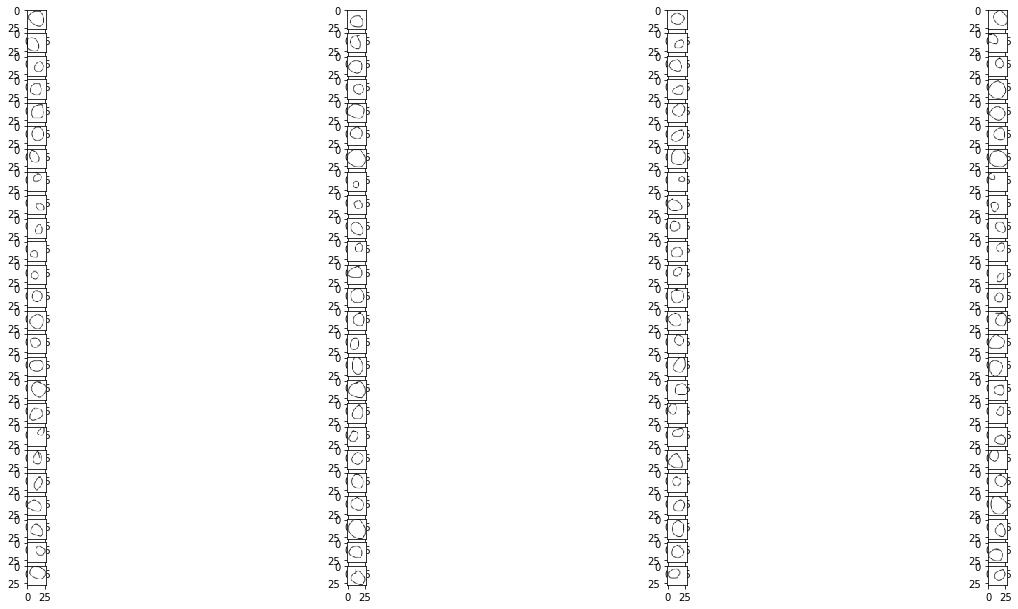

In [32]:
plt.figure(figsize=(22, 11))
columns = 4
for i , image in enumerate(circle_images):
    plt.subplot(len(circle_images)/ columns+1, columns, i+1)
    plt.imshow(image)

In [33]:
square_images = []
for img_path in glob.glob(path+'/shapes/squares/*.png'):
    square_images.append(mpimg.imread(img_path))

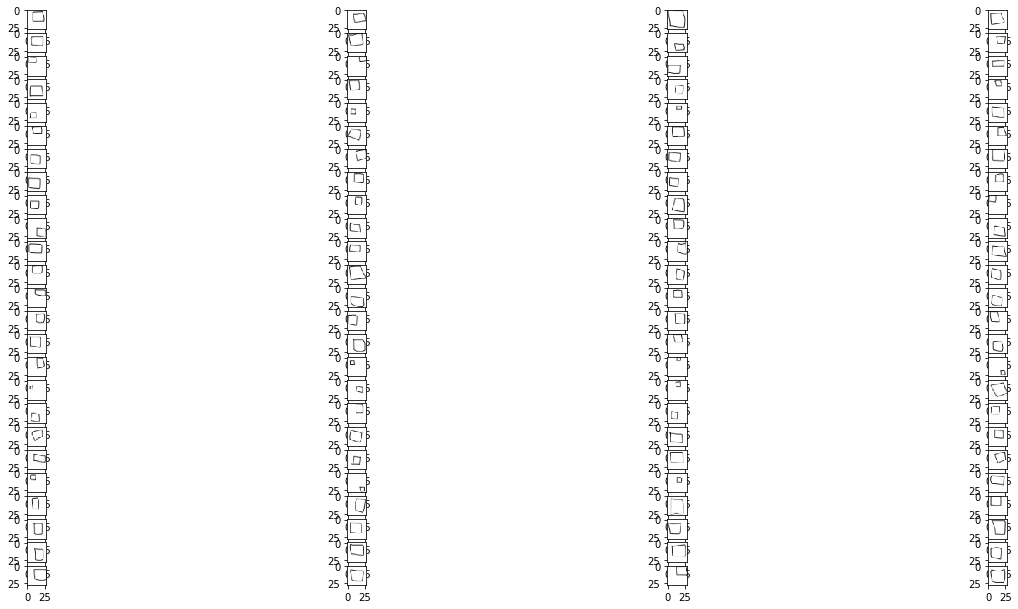

In [34]:
plt.figure(figsize=(22, 11))
columns = 4
for i , image in enumerate(square_images):
    plt.subplot(len(square_images)/ columns+1, columns, i+1)
    plt.imshow(image)

In [35]:
triangle_images = []
for img_path in glob.glob(path+'/shapes/triangles/*.png'):
    triangle_images.append(mpimg.imread(img_path))

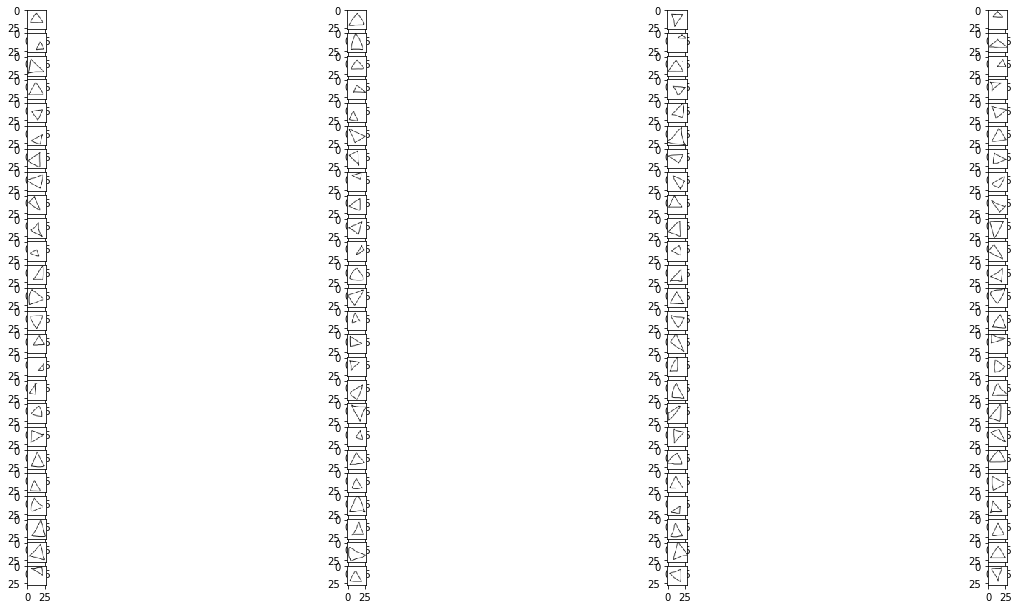

In [36]:
plt.figure(figsize=(22, 11))
columns = 4
for i , image in enumerate(triangle_images):
    plt.subplot(len(triangle_images)/ columns+1, columns, i+1)
    plt.imshow(image)

In [37]:
# Initialising the CNN
classifier = Sequential()

In [38]:
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), padding='same', input_shape = (28, 28, 3), activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5)) 

In [39]:
# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5)) 

In [40]:
# Adding a third convolutional layer
classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5)) 

In [41]:
# Step 3 - Flattening
classifier.add(Flatten())

In [42]:
# Step 4 - Full connection
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(Dropout(0.5)) 
classifier.add(Dense(units = 3, activation = 'softmax'))

In [43]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
__________

In [44]:
# Compiling the CNN
classifier.compile(optimizer = 'rmsprop',
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

In [45]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(path+'/training_set',
                                                 target_size = (28,
                                                 28),
                                                 batch_size = 16,
                                                 class_mode ='categorical')
test_set = test_datagen.flow_from_directory(path+'/test_set',
                                            target_size = (28, 28),
                                            batch_size = 16,
                                            class_mode ='categorical')

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
